# Datos anteriores

In [3]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
ventas["fecha"] = pd.to_datetime(ventas["fecha"], format="%Y-%m-%d")
ventas["horario"] = pd.to_datetime(ventas["horario"], format="%H:%M").dt.time

df = pd.merge(ventas, clientes, on="ID_compra", how="inner")
# Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "horario",
    "categoria",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota",
]

# Aplicar el orden de las columnas
df = df[columnas_ordenadas]

# Definiendo visualizaciones

## Preguntas
Despu√©s de la etapa de exploraci√≥n de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. As√≠, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### Ventas
1. ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?
2. ¬øCu√°l fue la facturaci√≥n por categor√≠a en 2023?
3. ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?
4. ¬øC√≥mo se divide la venta por trimestre por m√©todo de pago? ¬øExiste un per√≠odo en que alg√∫n tipo de pago se destaca?

### Perfil del cliente
5. ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?
6. ¬øC√≥mo est√°n distribuidas las evaluaciones del producto? ¬øTenemos buenos n√∫meros generales?
7. ¬øC√≥mo se distribuye nuestro p√∫blico por edad y sexo biol√≥gico? ¬øExiste un grupo que se destaca?

## Prompts

### Pregunta 1: ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en el 2023?
**Prompt**

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cu√°les m√©todos de pago fueron los m√°s utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuaci√≥n, deseamos crear una visualizaci√≥n que muestre la cantidad de esos m√©todos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

**Respuesta**

Perfecto. A continuaci√≥n te muestro c√≥mo:

1. Crear una **tabla resumen** llamada `metodos_de_pago` con el recuento de cada m√©todo de pago.
2. Construir una **visualizaci√≥n de barras** usando `matplotlib` y `seaborn` para mostrar la cantidad de veces que se utiliz√≥ cada uno.

Aqu√≠ tienes el c√≥digo completo:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']

# 2. Visualizaci√≥n
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', palette='Blues_d')

plt.title('Cantidad de Compras por M√©todo de Pago')
plt.xlabel('M√©todo de Pago')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

### üîç Explicaci√≥n:

* `value_counts()` cuenta la frecuencia de cada m√©todo de pago.
* `seaborn.barplot()` se usa para graficar los resultados con estilo limpio.
* El gr√°fico te ayudar√° a identificar de forma clara cu√°l m√©todo es m√°s popular entre los clientes.

¬øQuieres una versi√≥n alternativa en gr√°fico de torta (pie chart) o continuar con otro an√°lisis?

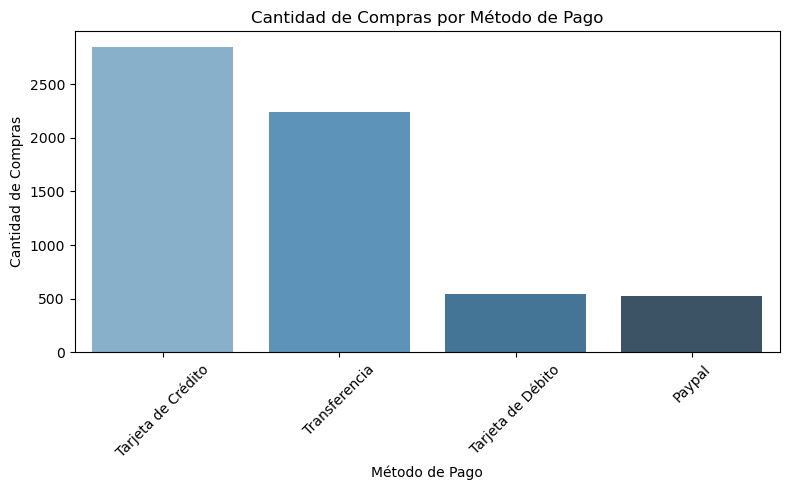

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 2. Visualizaci√≥n
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x="metodo_pago", y="cantidad", palette="Blues_d")

plt.title("Cantidad de Compras por M√©todo de Pago")
plt.xlabel("M√©todo de Pago")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparando los datos

### Pregunta 2: ¬øCu√°l fue la facturaci√≥n por categor√≠a en 2023?
> üöß Importante: Para la facturaci√≥n se considerar√° el producto entre el precio unitario y cantidad sumados al costo de env√≠o de cada producto.

**Prompt**
Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras horizontales que muestre la facturaci√≥n por categor√≠a de Zoop.

En "df", tenemos las siguientes columnas:

* categoria: categor√≠as de los productos
* precio_unitario: precio de una unidad del producto
* cantidad: cantidad vendida del producto
* envio: costo de env√≠o total de la compra.
* Deseamos crear una visualizaci√≥n que muestre la facturaci√≥n de cada categor√≠a, donde la facturaci√≥n se calcula multiplicando el precio unitario por la cantidad y sumando el costo de env√≠o.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

**Respuesta**
Perfecto. Para construir el gr√°fico de **barras horizontales** con la facturaci√≥n por categor√≠a, primero necesitas:

1. Calcular la facturaci√≥n total por compra: `precio_unitario * cantidad + envio`.
2. Agrupar los datos por `categoria`.
3. Sumar la facturaci√≥n por cada categor√≠a.
4. Visualizar con `matplotlib` o `seaborn`.

Aqu√≠ tienes el c√≥digo completo en Python:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear una columna de facturaci√≥n total por compra
df['facturacion'] = df['precio_unitario'] * df['cantidad'] + df['envio']

# 2. Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().sort_values()

# 3. Visualizaci√≥n en barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=facturacion_categoria.values, y=facturacion_categoria.index, palette='viridis')

plt.title('Facturaci√≥n por Categor√≠a de Producto')
plt.xlabel('Facturaci√≥n Total')
plt.ylabel('Categor√≠a')
plt.tight_layout()
plt.show()
```

### üîç Resultado:

Este gr√°fico de barras horizontales muestra claramente qu√© **categor√≠as de productos** generan mayor (o menor) facturaci√≥n, considerando tanto el valor de los productos como el costo del env√≠o.

¬øQuieres tambi√©n mostrar el **porcentaje de facturaci√≥n por categor√≠a** o ver c√≥mo var√≠a mensualmente por categor√≠a?


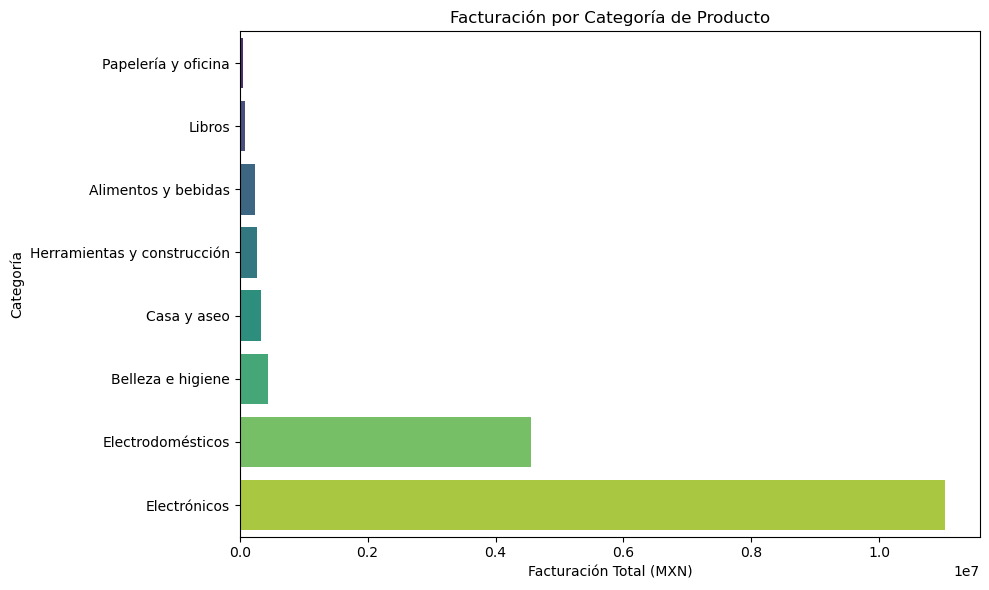

In [5]:
# 1. Crear una columna de facturaci√≥n total por compra
df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

# 2. Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby("categoria")["facturacion"].sum().sort_values()

# 3. Visualizaci√≥n en barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(
    x=facturacion_categoria.values, y=facturacion_categoria.index, palette="viridis"
)

plt.title("Facturaci√≥n por Categor√≠a de Producto")
plt.xlabel("Facturaci√≥n Total (MXN)")
plt.ylabel("Categor√≠a")
plt.tight_layout()
plt.show()

### Pregunta 3: ¬øC√≥mo fueron las ventas a lo largo de los meses en el 2023?

**Prompt**

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de l√≠neas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:

fecha: con las fechas de las compras en formato datetime (aaaa-mm-dd)
facturaci√≥n: calculada como el producto del precio unitario y la cantidad, sumado al costo de env√≠o de cada venta.
Deseamos crear una visualizaci√≥n que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del √≠ndice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gr√°fico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

**Respuesta**

Perfecto. Vamos a construir un **gr√°fico de l√≠neas** que muestre la **facturaci√≥n total por mes**, utilizando la columna `fecha` para agrupar y luego renombrar los meses con el diccionario de traducci√≥n.

Aqu√≠ est√° el c√≥digo completo:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna 'fecha' es datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear columna con el mes como texto completo
df['mes_nombre'] = df['fecha'].dt.strftime('%B')  # e.g., 'January', 'February', etc.

# Crear columna con el n√∫mero del mes para ordenar correctamente
df['mes_numero'] = df['fecha'].dt.month

# Calcular la facturaci√≥n mensual
ventas_mensuales = df.groupby(['mes_numero', 'mes_nombre'])['facturacion'].sum().reset_index()

# Ordenar por n√∫mero de mes
ventas_mensuales = ventas_mensuales.sort_values('mes_numero')

# Diccionario de traducci√≥n de meses
meses = {
    'January': 'Ene', 'February': 'Feb', 'March': 'Mar', 'April': 'Abr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Ago',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dic'
}

# Aplicar traducci√≥n
ventas_mensuales['mes'] = ventas_mensuales['mes_nombre'].map(meses)

# Visualizaci√≥n
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='mes', y='facturacion', marker='o', linewidth=2)

plt.title('Facturaci√≥n Total Mensual - Zoop')
plt.xlabel('Mes')
plt.ylabel('Facturaci√≥n')
plt.grid(True)
plt.tight_layout()
plt.show()
```

### ‚úÖ Resultado:

* El gr√°fico de l√≠neas muestra c√≥mo evoluciona la **facturaci√≥n mensual**.
* Se utilizan los nombres de los meses **traducidos al espa√±ol** para el eje X.
* El gr√°fico se ordena correctamente gracias al uso del n√∫mero de mes.

¬øTe gustar√≠a agregar etiquetas de valores sobre cada punto o comparar con el a√±o anterior si hubiera datos hist√≥ricos?


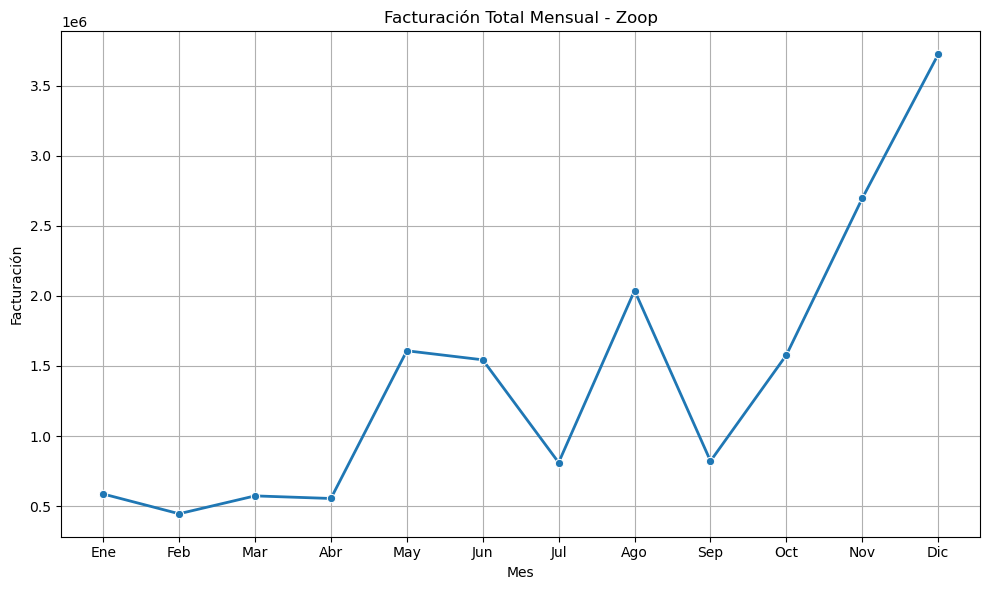

In [6]:
# Asegurarse de que la columna 'fecha' es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Crear columna con el mes como texto completo
df["mes_nombre"] = df["fecha"].dt.strftime("%B")  # e.g., 'January', 'February', etc.

# Crear columna con el n√∫mero del mes para ordenar correctamente
df["mes_numero"] = df["fecha"].dt.month

# Calcular la facturaci√≥n mensual
ventas_mensuales = (
    df.groupby(["mes_numero", "mes_nombre"])["facturacion"].sum().reset_index()
)

# Ordenar por n√∫mero de mes
ventas_mensuales = ventas_mensuales.sort_values("mes_numero")

# Diccionario de traducci√≥n de meses
meses = {
    "January": "Ene",
    "February": "Feb",
    "March": "Mar",
    "April": "Abr",
    "May": "May",
    "June": "Jun",
    "July": "Jul",
    "August": "Ago",
    "September": "Sep",
    "October": "Oct",
    "November": "Nov",
    "December": "Dic",
}

# Aplicar traducci√≥n
ventas_mensuales["mes"] = ventas_mensuales["mes_nombre"].map(meses)

# Visualizaci√≥n
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x="mes", y="facturacion", marker="o", linewidth=2)

plt.title("Facturaci√≥n Total Mensual - Zoop")
plt.xlabel("Mes")
plt.ylabel("Facturaci√≥n")
plt.grid(True)
plt.tight_layout()
plt.show()

# Composici√≥n de datos din√°micos

La composici√≥n es una categor√≠a importante de gr√°ficos que permiten la comprensi√≥n de los datos.
Los datos din√°micos son datos no est√°ticos, es decir que van cambiando en el tiempo.

Para este an√°lisis se a√±adir√°n 3 variables en simult√°neo, siendo una de estas categ√≥rica.

### Pregunta 4: ¬øC√≥mo est√° dividida la venta por trimestre por m√©todo de pago? ¬øExiste alg√∫n per√≠odo en el que alg√∫n tipo de pago se destaque?

#### Prompt

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras apiladas que muestre las ventas por trimestre en relaci√≥n con el m√©todo de pago de Zoop.

En "df", tenemos las siguientes columnas:

- fecha: con las fechas de las compras en formato datetime (aaaa-mm-dd)
- facturacion: con los valores de las ventas
metodo_pago: con el m√©todo de pago elegido en la compra
- Deseamos crear una visualizaci√≥n que muestre las ventas por trimestre, agrupando los m√©todos de pago de cada trimestre correspondientes a cada compra.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

#### Respuesta

Excelente, para construir un **gr√°fico de barras apiladas** con la **facturaci√≥n por trimestre separada por m√©todo de pago**, realizaremos los siguientes pasos:

##### ‚úÖ Pasos:

1. Asegurarnos de que la columna `fecha` es tipo `datetime`.
2. Crear una columna `trimestre` a partir de la fecha.
3. Agrupar los datos por `trimestre` y `metodo_pago`, sumando la `facturacion`.
4. Reorganizar los datos en formato de tabla cruzada (pivot table) para graficar.
5. Crear un gr√°fico de **barras apiladas** con `matplotlib`.

##### üß† C√≥digo en Python:

```python
import pandas as pd
import matplotlib.pyplot as plt

# 1. Asegurar que 'fecha' es datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# 2. Crear columna de trimestre (formato 'T1', 'T2', etc.)
df['trimestre'] = df['fecha'].dt.to_period('Q').astype(str).str.replace('2023Q', 'T')

# 3. Agrupar por trimestre y m√©todo de pago, sumando facturaci√≥n
ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack(fill_value=0)

# 4. Crear gr√°fico de barras apiladas
ventas_trimestre.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

plt.title('Facturaci√≥n por Trimestre y M√©todo de Pago - Zoop')
plt.xlabel('Trimestre')
plt.ylabel('Facturaci√≥n')
plt.legend(title='M√©todo de Pago')
plt.tight_layout()
plt.show()
```

##### üìä Resultado:

* Cada barra representa un **trimestre (T1, T2, T3, T4)**.
* Cada segmento de color en la barra representa un **m√©todo de pago**.
* El gr√°fico muestra la **composici√≥n de facturaci√≥n por m√©todo** en cada trimestre.

¬øTe gustar√≠a complementar con proporciones (%), agregar totales por encima de cada barra o realizarlo con `seaborn`?


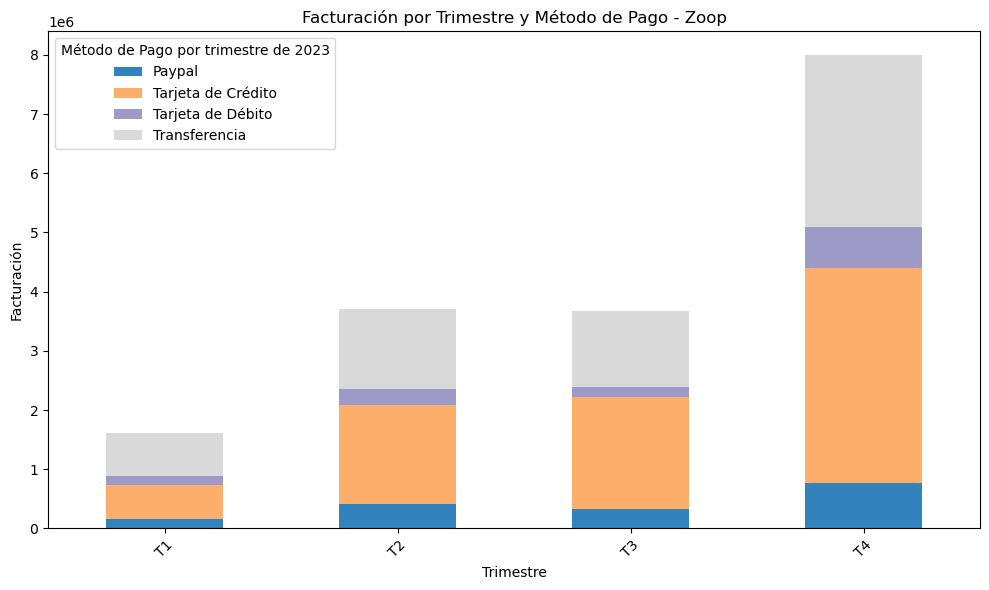

In [9]:
# 1. Asegurar que 'fecha' es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# 2. Crear columna de trimestre (formato 'T1', 'T2', etc.)
df["trimestre"] = df["fecha"].dt.to_period("Q").astype(str).str.replace("2023Q", "T")

# 3. Agrupar por trimestre y m√©todo de pago, sumando facturaci√≥n
ventas_trimestre = (
    df.groupby(["trimestre", "metodo_pago"])["facturacion"].sum().unstack(fill_value=0)
)

# 4. Crear gr√°fico de barras apiladas
ventas_trimestre.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20c")

plt.title("Facturaci√≥n por Trimestre y M√©todo de Pago - Zoop")
plt.xlabel("Trimestre")
plt.ylabel("Facturaci√≥n")
plt.legend(title="M√©todo de Pago por trimestre de 2023")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Graficando con columnas agrupadas

La directiva de Zoop est√° preocupada por las categor√≠as con menor facturaci√≥n anual en su e-commerce y, por eso, le gustar√≠a entender el desempe√±o de esas categor√≠as de manera aislada. Para esto, recibimos la demanda de explorar la facturaci√≥n trimestral investigando c√≥mo est√° el equilibrio de estas ventas por cada categor√≠a.

Para resolver este problema, vamos a agrupar las 3 categor√≠as con las menores facturaciones anuales, separ√°ndolas por trimestre mediante un gr√°fico de columnas agrupadas.

¬øPor qu√© un gr√°fico de columnas agrupadas?

Un gr√°fico de columnas agrupadas es ideal para comparar categor√≠as diferentes en relaci√≥n con una variable (puede ser temporal o no), mostrando c√≥mo los valores se comparan dentro de cada categor√≠a en columnas separadas, facilitando la visualizaci√≥n de patrones y diferencias entre grupos.

#### Prompt

Tenemos un DataFrame llamado "df" y queremos construir una visualizaci√≥n de un gr√°fico de columnas agrupadas lado a lado que presente las ventas por trimestre en relaci√≥n con las categor√≠as de los productos.

En "df", tenemos las columnas:

- trimestre: con las fechas en trimestres de las compras
- faturamento: con los valores de las ventas
- categoria: con las categor√≠as de los productos vendidos. Vamos a utilizar solo las categor√≠as "Papeler√≠a y oficina", "Libros" y "Alimentos y bebidas".
Deseamos crear una visualizaci√≥n que presente las ventas por trimestre ("facturacion"), agrupando las categor√≠as lado a lado en relaci√≥n con el trimestre correspondiente a cada compra.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.
#### Respuesta

Perfecto, vamos a crear un **gr√°fico de columnas agrupadas lado a lado** para mostrar las **ventas por trimestre**, comparando tres categor√≠as espec√≠ficas: **"Papeler√≠a y oficina"**, **"Libros"** y **"Alimentos y bebidas"**.

### ‚úÖ Pasos:

1. Filtrar el DataFrame para quedarnos solo con las 3 categor√≠as deseadas.
2. Agrupar por `trimestre` y `categoria`, sumando la `facturacion`.
3. Transformar los datos en formato de tabla cruzada (pivot table).
4. Crear el gr√°fico de columnas agrupadas con `matplotlib`.

---

### üß† C√≥digo en Python:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar solo las 3 categor√≠as deseadas
categorias_interes = ['Papeler√≠a y oficina', 'Libros', 'Alimentos y bebidas']
df_filtrado = df[df['categoria'].isin(categorias_interes)]

# Agrupar por trimestre y categor√≠a, sumando la facturaci√≥n
ventas_categoria = df_filtrado.groupby(['trimestre', 'categoria'])['facturacion'].sum().unstack(fill_value=0)

# Crear gr√°fico de columnas agrupadas
ventas_categoria.plot(kind='bar', figsize=(10, 6), colormap='Set2')

# T√≠tulo y etiquetas
plt.title('Facturaci√≥n por Trimestre y Categor√≠a - Zoop')
plt.xlabel('Trimestre')
plt.ylabel('Facturaci√≥n')
plt.xticks(rotation=0)
plt.legend(title='Categor√≠a')

plt.tight_layout()
plt.show()
```

---

### üìä Resultado:

* Cada **grupo de barras** representa un **trimestre** (`T1`, `T2`, etc.).
* Dentro de cada grupo, hay **tres barras**, una por categor√≠a.
* Muestra claramente c√≥mo se comport√≥ la facturaci√≥n de cada categor√≠a en cada trimestre.

¬øQuieres que te muestre la versi√≥n con porcentajes, etiquetas de valor sobre cada barra o exportar el gr√°fico como imagen?

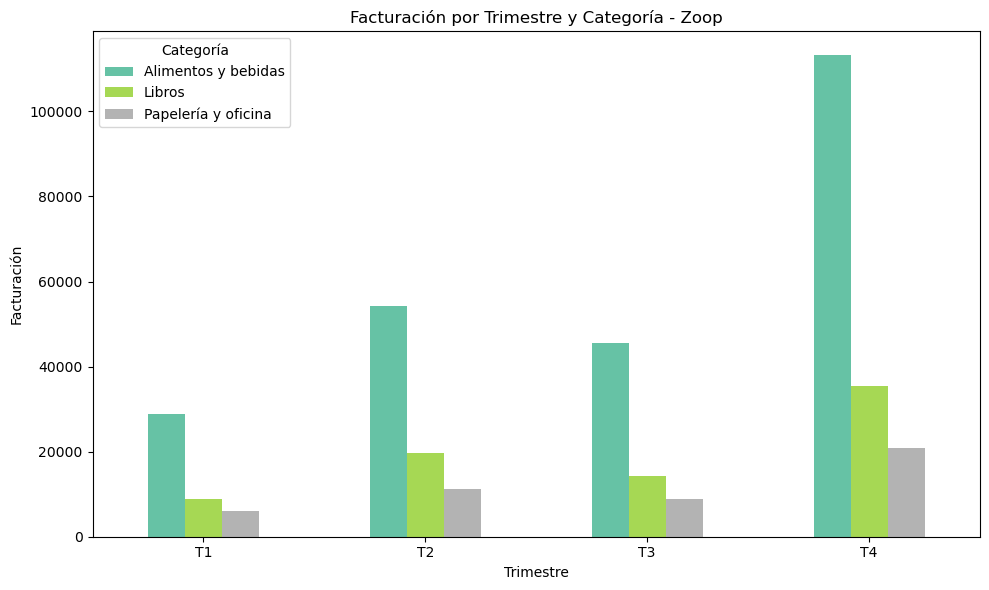

In [10]:
# Filtrar solo las 3 categor√≠as deseadas
categorias_interes = ["Papeler√≠a y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df["categoria"].isin(categorias_interes)]

# Agrupar por trimestre y categor√≠a, sumando la facturaci√≥n
ventas_categoria = (
    df_filtrado.groupby(["trimestre", "categoria"])["facturacion"]
    .sum()
    .unstack(fill_value=0)
)

# Crear gr√°fico de columnas agrupadas
ventas_categoria.plot(kind="bar", figsize=(10, 6), colormap="Set2")

# T√≠tulo y etiquetas
plt.title("Facturaci√≥n por Trimestre y Categor√≠a - Zoop")
plt.xlabel("Trimestre")
plt.ylabel("Facturaci√≥n")
plt.xticks(rotation=0)
plt.legend(title="Categor√≠a")

plt.tight_layout()
plt.show()